In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Modelling
from sklearn.tree import DecisionTreeRegressor

# Metrics 
from sklearn.metrics import mean_squared_error


In [2]:
# Creating the dataset
test = pd.DataFrame({'x':[0,1,2,2,3,5,6,7], 'y':[10,20,30,400,40, 60,80,70]})

In [3]:
# This tree was set to not have cols > 5, it's implementation isn't 100% yet

def decision_tree(X_train, y, max_depth = 20, max_column = 5):
    '''Finds the spliting threshold for the root of the tree'''
    
    # Initializing 
    mse = []
    min_thresholds = []
    feats = []
    min_error = []
    target_var_name = y.columns.values[0]
    
    # Step 1: Ensuring that X_train has a minimum of 5 columns
    n_columns = X_train.shape[1]
    if n_columns > 5:
        raise ValueError('Ensure that the no of columns in the training set is <= 5')
    else: 
        
    # Step 2: Getting the root split
        all_columns = X_train.columns
        
        # Looping through all columns to find best threshold
        for col in all_columns:
            df = X_train.sort_values(col)
            y = y.iloc[df.index]
            
            # Getting unique values in selected column in ascending order
            unique_values = sorted(df[col].unique())
            
            # Getting the threshold as the average between subsequent value after sorting the unique values
            thresholds = [(a+b)/2 for a, b in zip(unique_values[:len(unique_values)], unique_values[1:])]
            
            # Displaying threshold
            print('Threshold Values', thresholds)
            
            # Looping through thresholds and spliting the dataset based on different thresholds to calculate loss and see 
            # which yields the lowest
            for threshold in thresholds:
                # Values in one part of threshold
                df1 = df[df[col]<=threshold]
                y1 = y[y.index.isin([a for a in df1.index.values])]
               
                # Getting the prediction for that node as average of values
                y1_pred = [np.mean(y1.values)]*len(y1)
                
                # Values in second part of threshold
                df2 = df[df[col]>threshold]
                y2 = y[y.index.isin([b for b in df2.index.values])]
                
                # Getting the prediction for that node as average of values
                y2_pred = [np.mean(y2.values)]*len(y2)
                                
                # THE MEAN SQUARED ERROR FOR EACH NODE SHOULD BE CALCULATED SEPERATELY and the weighted average can be 
                # computed it's actually called variance reduction
                
                mse_1 = mean_squared_error(y1, y1_pred)
                mse_2 = mean_squared_error(y2, y2_pred)
                mse_ = (len(y1)*mse_1+len(y2)*mse_2)/(len(y1)+len(y2))

                mse.append(mse_)
            print('Error for each threshold',mse)  
            selected_threshold = thresholds[mse.index(min(mse))]
            lowest_error = mse[mse.index(min(mse))]
            
            min_thresholds.append(selected_threshold)
            min_error.append(lowest_error)
            feats.append(col)
            
            print('{} is the selected threshold for root of tree because it gave lowest error of {}'
                  .format(selected_threshold, lowest_error))
            mse = []
            
        min_thresh_index = min_error.index(min(min_error))
        initial_thres = min_thresholds[min_thresh_index]
        initial_feat = feats[min_thresh_index]
        
        # Joining X and Y for easy extraction
        data = pd.concat([X_train, y], axis = 1)
        
        left_node_prediction = np.mean(data[data[initial_feat] <= initial_thres][target_var_name])
        right_node_prediction = np.mean(data[data[initial_feat] > initial_thres][target_var_name])
        
        return initial_feat, initial_thres, left_node_prediction, right_node_prediction
            

In [4]:
decision_tree(test[['x']], test[['y']])

Threshold Values [0.5, 1.5, 2.5, 4.0, 5.5, 6.5]
Error for each threshold [13475.0, 12547.916666666668, 13671.875, 14150.0, 14297.916666666666, 14310.714285714283]
1.5 is the selected threshold for root of tree because it gave lowest error of 12547.916666666668


('x', 1.5, 15.0, 113.33333333333333)

## Using Scikit learn to show the tree

In [5]:
# Model fitting
dec = DecisionTreeRegressor()
dec.fit(test[['x']], test[['y']])

DecisionTreeRegressor()

[Text(0.36363636363636365, 0.9166666666666666, 'x <= 1.5\nsquared_error = 14360.938\nsamples = 8\nvalue = 88.75'),
 Text(0.18181818181818182, 0.75, 'x <= 0.5\nsquared_error = 25.0\nsamples = 2\nvalue = 15.0'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.5454545454545454, 0.75, 'x <= 2.5\nsquared_error = 16722.222\nsamples = 6\nvalue = 113.333'),
 Text(0.45454545454545453, 0.5833333333333334, 'squared_error = 34225.0\nsamples = 2\nvalue = 215.0'),
 Text(0.6363636363636364, 0.5833333333333334, 'x <= 4.0\nsquared_error = 218.75\nsamples = 4\nvalue = 62.5'),
 Text(0.5454545454545454, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 40.0'),
 Text(0.7272727272727273, 0.4166666666666667, 'x <= 5.5\nsquared_error = 66.667\nsamples = 3\nvalue = 70.0'),
 Text(0.6363636363636364, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue 

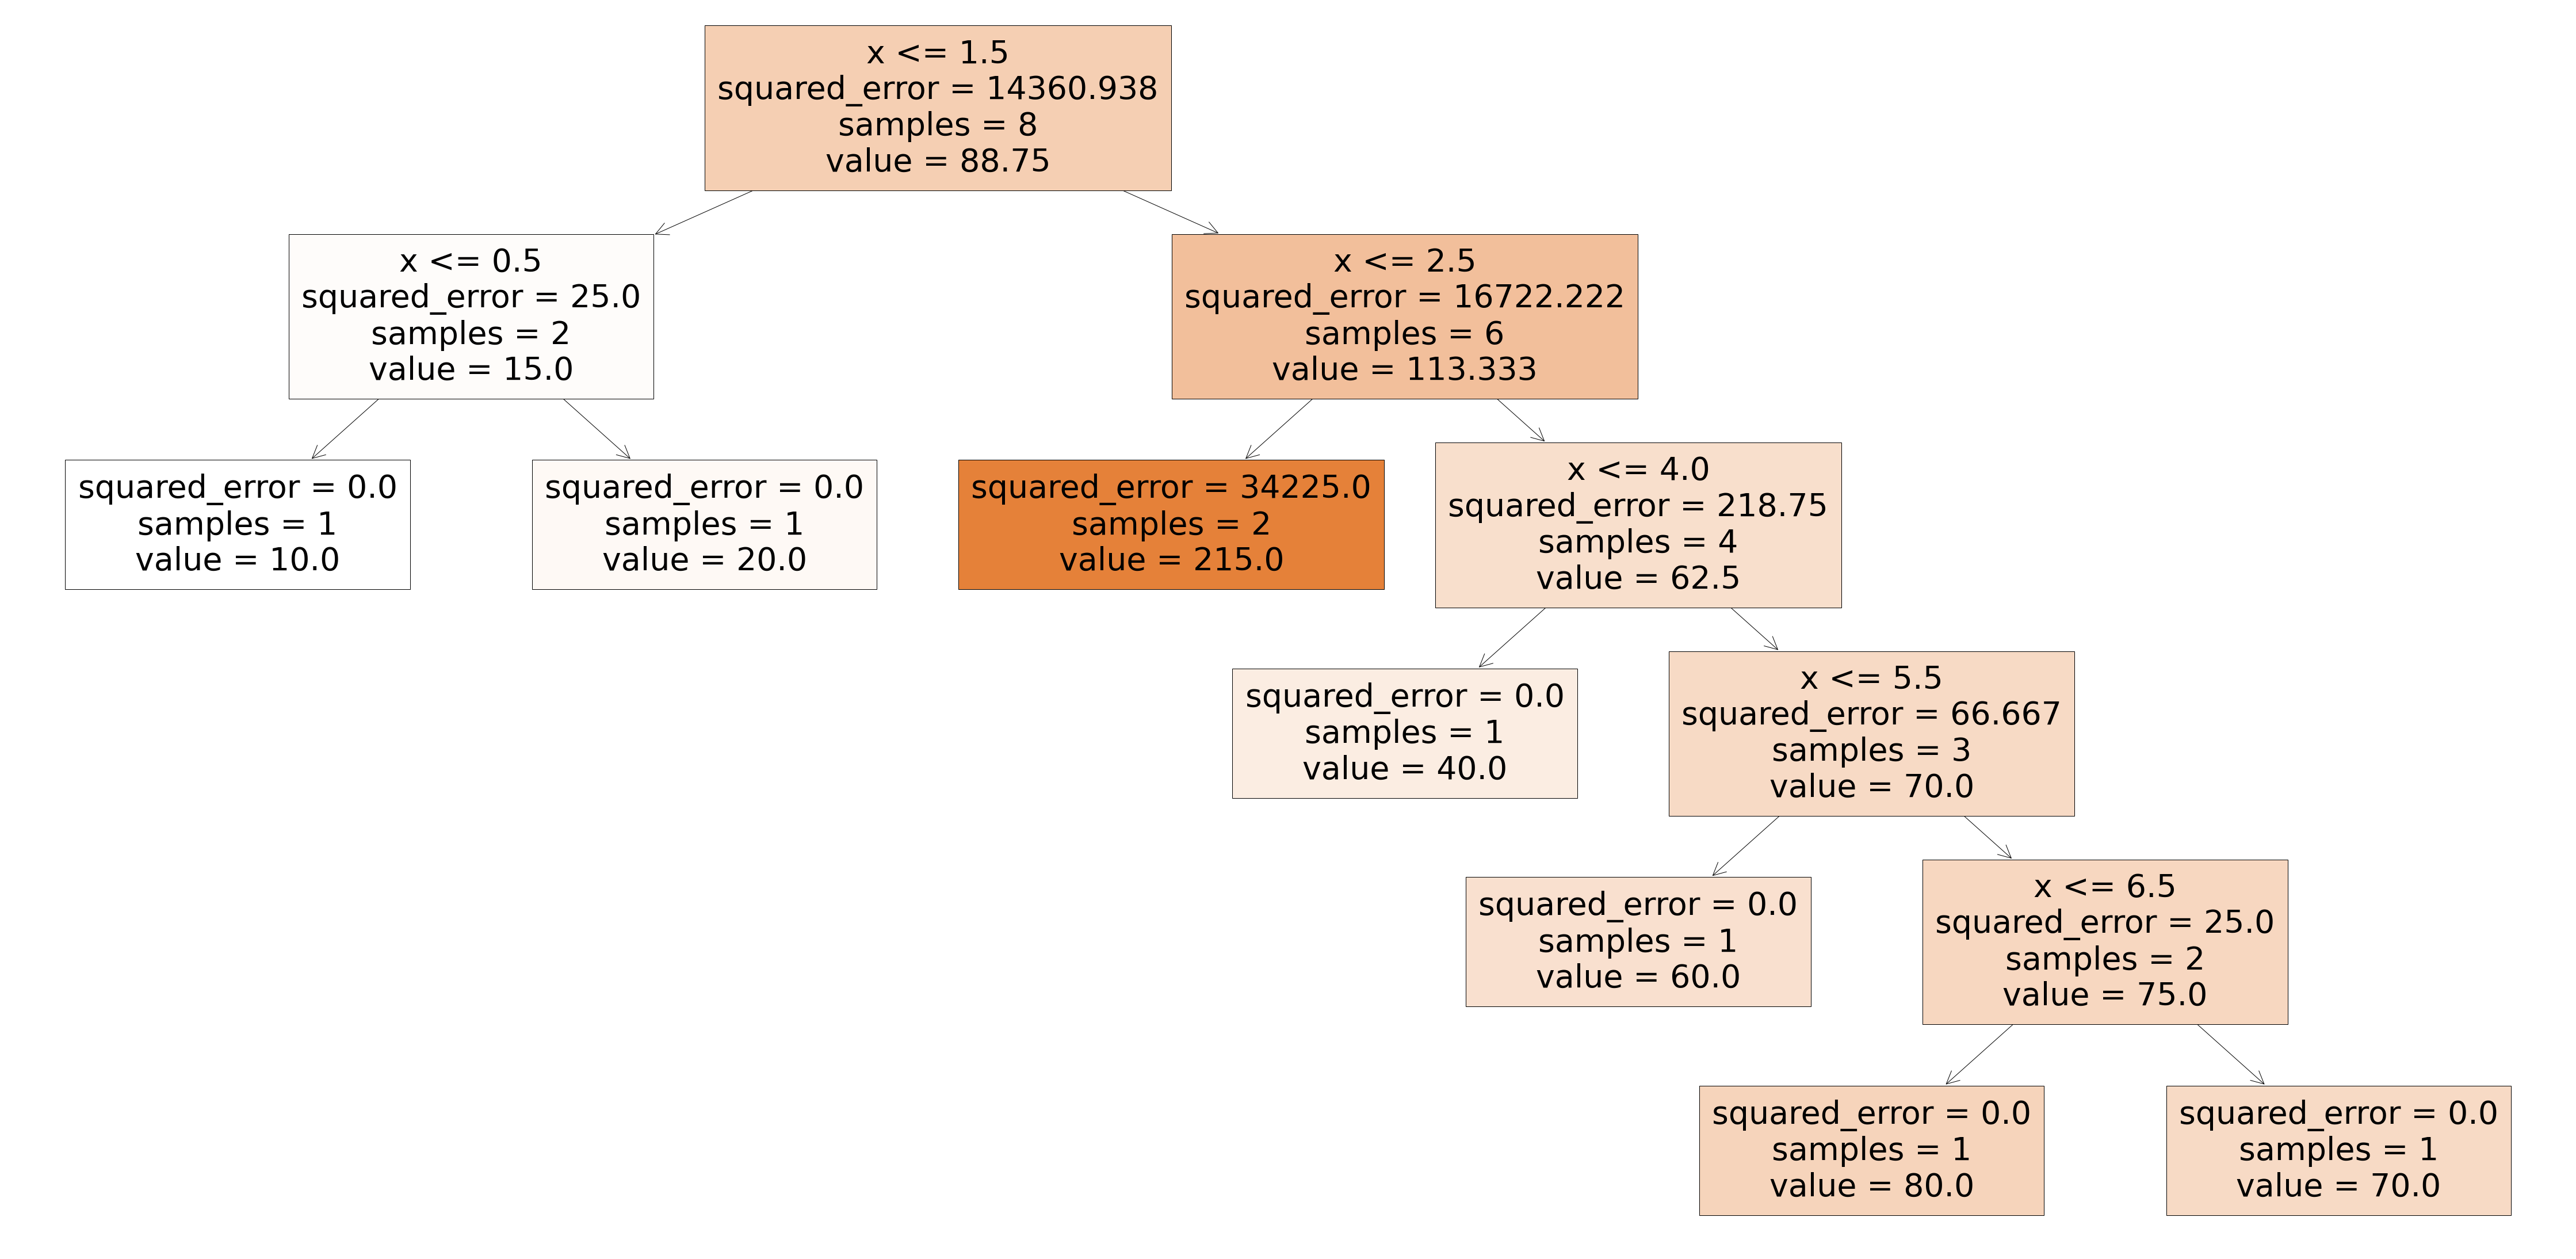

In [6]:
## Plotting the tree
plt.figure(figsize=(80,40))
plot_tree(dec, feature_names = ['x'], filled=True)

In [7]:
# The thresholds for the differemt nodes
root_split_threshold = dec.tree_.threshold
root_split_threshold

array([ 1.5,  0.5, -2. , -2. ,  2.5, -2. ,  4. , -2. ,  5.5, -2. ,  6.5,
       -2. , -2. ])